### Import libraries

In [119]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

### Data loading

In [71]:
df = pd.read_csv(r"C:\Users\HP\Documents\PHASE3\project_3\bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [73]:

print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Preprocessing

In [74]:
# drop irrelevant identifiers
df.drop(['phone number'], axis=1, inplace=True)

### Encode target

In [76]:
# we are Converting Categorical Target (Churn: True/False → 1/0)
df['churn'] = df['churn'].map({True: 1, False: 0})
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [24]:
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object


#### The above is the display of our data types

In [77]:
# idenifying the columns that are text based
print(df.select_dtypes(include='object').nunique())


state                 51
international plan     2
voice mail plan        2
dtype: int64


### Label Encoding

In [78]:
# encoding changing yes/no to binary in international plan and voice mail plan
le = LabelEncoder()
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


#### We have manged to convert the internation plan and the voice mail plan into binary using the label encoding since it only has two features  which is "Yes/No" thus making it more effecient for modelling.

In [90]:
df.drop(['state', 'area code'], axis=1, inplace=True)


### Scaling

In [91]:
# Feature Scaling (for numeric columns)
scaler = StandardScaler()
num_cols = ['account length', 'total day minutes', 'total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge',
            'total night minutes', 'total night calls', 'total night charge',
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.676489,0,1,25,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0
1,0.149065,0,1,26,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0
2,0.902529,0,0,0,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0
3,-0.428590,1,0,0,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0
4,-0.654629,1,0,0,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0


## Classification 
#### Logistic regression _ this we  used to predict categorical outcomes moreso the binary outcome. it  also model the probability that a given outcome belong to a certain class


### Split Data

In [92]:
#  Define Features (X) and Target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

      account length  international plan  voice mail plan  \
817         3.564766                   0                0   
1373        0.174180                   0                0   
679        -0.654629                   1                0   
56          1.002990                   0                0   
1993       -0.378359                   0                0   
...              ...                 ...              ...   
1095        0.123950                   0                0   
1130        0.525797                   0                0   
1294       -0.880668                   0                0   
860         1.706223                   0                0   
3174       -1.634132                   0                1   

      number vmail messages  total day minutes  total day calls  \
817                       0          -1.547490        -0.420393   
1373                      0          -1.244511         0.227466   
679                       0           0.782694        -1.118088   

### Model Training and Evaluation

### Linear Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.57      0.16      0.25       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.58       667
weighted avg       0.82      0.85      0.82       667



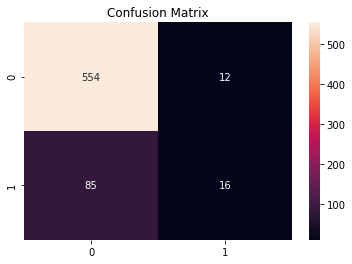

In [93]:

#  Initialize and train model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

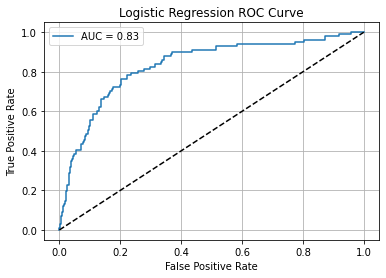

In [124]:
#  ROC Curve
y_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.grid()
plt.show()



### Decision Tree 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       566
           1       0.76      0.73      0.74       101

    accuracy                           0.92       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.92      0.92      0.92       667

Confusion Matrix:
[[542  24]
 [ 27  74]]


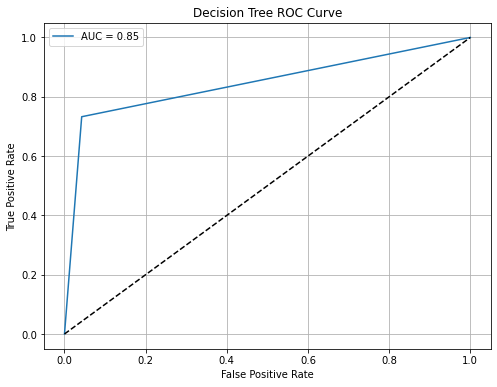

In [118]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
# ROC Curve
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob_dt):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.grid()
plt.show()

This model is perfectly fit as it accuracy is close to 1.

### Linear Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.65      0.11      0.19       101

    accuracy                           0.86       667
   macro avg       0.75      0.55      0.55       667
weighted avg       0.83      0.86      0.81       667

Confusion Matrix:
[[560   6]
 [ 90  11]]


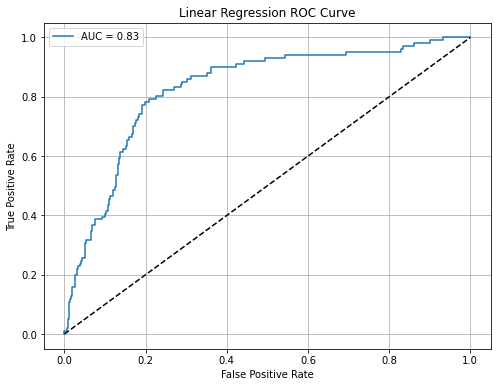

In [120]:
# Initialize the model
lin_model = LinearRegression()

# Fit the model
lin_model.fit(X_train, y_train)

# Predict probabilities (continuous outputs)
y_prob_lin = lin_model.predict(X_test)

# Convert probabilities to binary classification (threshold = 0.5)
y_pred_lin = np.where(y_prob_lin >= 0.5, 1, 0)

# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_lin))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lin))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lin)
auc_score = roc_auc_score(y_test, y_prob_lin)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Linear Regression ROC Curve")
plt.legend()
plt.grid()
plt.show()

linear regression model is not fit hence not appropriate for use in our dataset

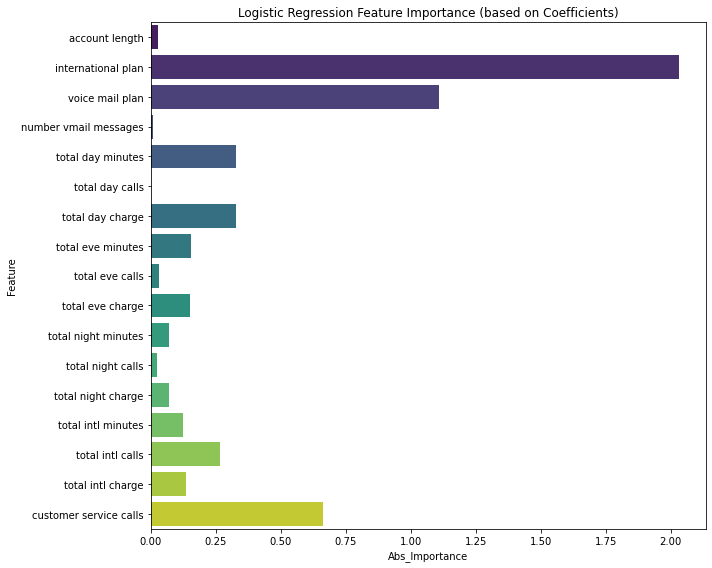

In [107]:
# Get coefficients (as importance)
importances = log_model.coef_[0]  # model.coef_ is a 2D array: shape (1, n_features)

# Get feature names
feature_names = X.columns

# Create a DataFrame
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

#  Sort by absolute importance
fi_df['Abs_Importance'] = fi_df['Importance'].abs()
fi_df.sort_values('Abs_Importance', ascending=False)

# Plot

plt.figure(figsize=(10,8))
sns.barplot(data=fi_df, x='Abs_Importance', y='Feature', palette='viridis')
plt.title('Logistic Regression Feature Importance (based on Coefficients)')
plt.tight_layout()
plt.show()



### Conclusion
- Logistic Regression and Decision Tree models are effective for churn prediction.
- Linear Regression is included for comparison but not ideal for classification.